In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from celluloid import Camera

In [2]:
data = pd.read_csv('linreg_example.csv')

X = np.array([data.x.values.tolist(), data.y.values.tolist()])

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x=X[0,:], y=X[1,:], s=150, c='#79AEA3', label='Data')
ax.set_ylabel('y')
ax.set_xlabel(r'x')

ax.set_ylim([-0.5, 5.5])
ax.set_xlim([-0.5, 5.5])

ax.legend()
#fig.savefig('linear_regression_1.png', bbox_inches='tight', transparent=True)

In [ ]:
def f(x, a, b):
    return np.multiply(a, x + b)

In [ ]:
px = np.linspace(0, max(X[0,:]), 5)

a = [1, 0.64, 0.75, 0.9, 0.683]
b = [0, 0.2, 0.4, -0.2, -0.15]

camera = Camera(plt.figure(figsize=(8,8)))

plt.ylim([-0.5, 5.5])
plt.xlim([-0.5, 5.5])

for i, x in enumerate(a):
    plt.scatter(x=X[0,:], y=X[1,:], s=150, c='#79AEA3', label='Data')
    py = f(px, a[i], b[i])    
    plt.plot(px, py, alpha=0.4, label='Fit ' + str(i))

    camera.snap()
    
anim = camera.animate(blit=True)
anim.save('which_reg.gif', writer='imagemagick')

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x=X[0,:], y=X[1,:], s=150, c='#79AEA3', label='Data')
ax.plot([-0.5, 5.5], [np.mean(X[1,:]), np.mean(X[1,:])], c='black', label=r'$y = $' + str(round(np.mean(X[1,:]), 2)))

ax.set_ylabel('y')
ax.set_xlabel('x')

ax.set_ylim([-0.5, 5.5])
ax.set_xlim([-0.5, 5.5])

ax.legend()
fig.savefig('linear_regression_2.png', bbox_inches='tight', transparent=True)

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x=X[0,:], y=X[1,:], s=150, c='#79AEA3', label='Data')
ax.plot([-0.5, 5.5], [np.mean(X[1,:]), np.mean(X[1,:])], c='black', label=r'$y = $' + str(round(np.mean(X[1,:]), 2)))

[ax.plot([val, val], [X[1,idx], np.mean(X[1,:])] , c='#DB5461') for idx, val in enumerate(X[0,:])];

ax.set_ylabel('y')
ax.set_xlabel('x')

ax.text(-0.17, -0.2, r'$x_1, y_1$')
ax.text(X[0,0]-0.17, X[1,0] -0.2, r'$x_2, y_2$')
ax.text(X[0,1]-0.17, X[1,1] +0.2, r'$x_5, y_5$')
ax.text(X[0,2]-0.17, X[1,2] -0.2, r'$x_3, y_3$')
ax.text(X[0,3]-0.17, X[1,3] +0.2, r'$x_4, y_4$')

ax.set_ylim([-0.5, 5.5])
ax.set_xlim([-0.5, 5.5])

ax.legend()
fig.savefig('linear_regression_3.png', bbox_inches='tight', transparent=True)

In [4]:
def RSS(y, y_predicted):
    return np.sum(np.subtract(y, y_predicted)**2)

def TSS(y, y_predicted):
    y_mean = np.mean(y)
    return np.sum(np.subtract(y_mean, y_predicted)**2)

In [ ]:
y_pred = f(X[0,:], 0.75, 0)

print(RSS(X[1,:], y_pred)) 

In [ ]:
y_pred = f(X[0,:], 0.75, 0)

for i, val in enumerate(X[0,:]):
    print('x' + str(i) +' f(x' + str(i) + '): ' + str(y_pred[i]) + ' RSS: ' + str(np.subtract(X[1, i], y_pred[i])**2))

In [ ]:
rss = []
slope = np.linspace(0, 1, 20)

for s in slope:
    rss.append(RSS(X[1,:], f(X[0,:], s, 0)))
    print('b: ' + str(round(s,2 )) + '| RSS: ' + str(rss[-1]))
    
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(slope, rss)

In [ ]:
rss = []
slope = np.linspace(-5, 5, 50)

for s in slope:
    rss.append(RSS(X[1,:], f(X[0,:], 0.79, s)))
    print('b0: ' + str(round(s,2 )) + '| RSS: ' + str(rss[-1]))
    
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(slope, rss)

In [ ]:
def f(x, a, b):
    return np.multiply(a, x + b)

a = 0.75
b = 0

px = np.linspace(-0.5, 5.5, 10)
py = f(px, a, b)

fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x=X[0,:], y=X[1,:], s=150, c='#79AEA3', label='Data')
ax.plot(px, py, c='black', label=r'$y = ' + str(round(b,2)) + '+ '+ str(round(a,2)) + 'x_1$')

[ax.plot([val, val], [X[1,idx], f(val, a, b)] , c='#DB5461') for idx, val in enumerate(X[0,:])];
ax.set_ylabel('y')
ax.set_xlabel('x')

ax.set_ylim([-0.5, 5.5])
ax.set_xlim([-0.5, 5.5])

ax.legend()
fig.savefig('linear_regression_4.png', bbox_inches='tight', transparent=True)

0.7349982547790558


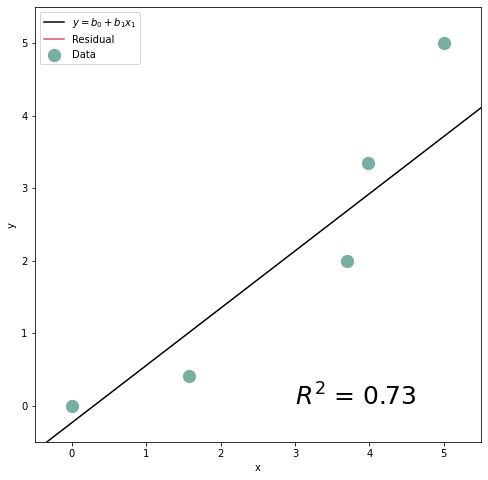

In [8]:
def f(x, a, b):
    return np.multiply(a, x + b)

# Determine R^2-value



a = 0.79
b = -0.3
px = np.linspace(-0.5, 5.5, 10)
py = f(px, a, b)


r2 = 1- (RSS(X[1,:], f(X[0,:], a, b))/TSS(X[1,:], f(X[0,:], a, b)))
print(r2)

fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(x=X[0,:], y=X[1,:], s=150, c='#79AEA3', label='Data')
ax.plot(px, py, c='black', label=r'$y = b_0 + b_1x_1$')
ax.plot(2,0, marker=None, c='#DB5461', label='Residual')

ax.set_ylabel('y')
ax.set_xlabel('x')

ax.set_ylim([-0.5, 5.5])
ax.set_xlim([-0.5, 5.5])
ax.text(3,0, r'$R^2$ = '+str(round(r2,2)), fontsize=25)

ax.legend()
fig.savefig('linear_regression_5.png', bbox_inches='tight', transparent=True)

(b-y_0)² + (b-y_1)² + (b-y_2)² + (b-y_3)² + ... + (b-y_n-1)²

In [ ]:
%matplotlib qt
iter = 0  # Initial iteration counter
itersteps = 250  # Total number of iterations
 
# Initial guesses for linear regression model of y=mx+b and arrays to keep track of values over iterations
m = np.zeros(itersteps)
b = np.zeros(itersteps)
J = np.zeros(itersteps)

# Creating mesh for 3D Surface Plot of MSE
mm = np.linspace(-10, 10, 500)
bb = np.linspace(-10, 10, 500)
mmm, bbb = np.meshgrid(mm, bb)
 
JJ = np.zeros([len(mm), len(bb)])


x_test = X[0,:]
y_test = X[1,:]
n = len(y_test)

for i in range(len(mm)):
    for j in range(len(bb)):
        yy = mmm[i, j] * x_test + bbb[i, j]
        JJ[i, j] = 1 / n * np.sum((y_test - yy) ** 2)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(mmm, bbb, JJ, cmap=plt.cm.bone)
#fig3.colorbar(surf)
 
ax.plot(m[:-1], b[:-1], J[:-1], 'red')
ax.scatter(m[-2], b[-2], J[-2], c='b', marker="o",label='Gradient Descent')
ax.text(m[-2], b[-2], J[-2], '%s' % ('MSE: '+str(round(J[-2],5))), color='k')

ax.set_xlabel(r'$b_1$')
ax.set_ylabel(r'$b_0$')
ax.set_zlabel('MSE')
fig.savefig('solution_space.png', bbox_inches='tight', transparent=True)

In [ ]:
from matplotlib import animation

def rotate(angle):
     ax.view_init(azim=angle)

angle = 3
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=50)
ani.save('solution_space.gif', writer=animation.PillowWriter(fps=20)) # , savefig_kwargs={'transparent': True}